In [1]:
!pip install citipy

In [2]:
#Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np
import random
from citipy import citipy


In [3]:
#Configuration information
api_key = "e94b600ef6b88e708cdd933c9f1bc690"
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
#build partial query url
#query_url = url + "appid=" + api_key + "lat=" + lat_str + "lon=" + lon_str
query_url = url + "appid=" + api_key + "&q=" 


In [5]:
# Random figures for the latitudes and longitudes


lats = np.random.randint(-90,90, size=550 )
long = np.random.randint(-180,180, size=550 )
    
City = []
weather_data = []

counter = 0 
for lat, lon in zip(lats, long):
    city = citipy.nearest_city(lat, lon)
    res = req.get(query_url + city.city_name)
    if res.status_code != 404:
        weather_data.append(res.json())
        counter =  counter + 1
        
    if counter >= 500:
        break

weather_data
    
  

[{'base': 'stations',
  'clouds': {'all': 8},
  'cod': 200,
  'coord': {'lat': -34.42, 'lon': 19.24},
  'dt': 1520110654,
  'id': 3366880,
  'main': {'grnd_level': 988.1,
   'humidity': 81,
   'pressure': 988.1,
   'sea_level': 1027.32,
   'temp': 289.288,
   'temp_max': 289.288,
   'temp_min': 289.288},
  'name': 'Hermanus',
  'sys': {'country': 'ZA',
   'message': 0.0047,
   'sunrise': 1520051568,
   'sunset': 1520097371},
  'weather': [{'description': 'clear sky',
    'icon': '02n',
    'id': 800,
    'main': 'Clear'}],
  'wind': {'deg': 102.5, 'speed': 2.66}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 27.87, 'lon': -0.29},
  'dt': 1520107200,
  'id': 2508813,
  'main': {'humidity': 17,
   'pressure': 1008,
   'temp': 296.15,
   'temp_max': 296.15,
   'temp_min': 296.15},
  'name': 'Adrar',
  'sys': {'country': 'DZ',
   'id': 6220,
   'message': 0.0054,
   'sunrise': 1520058175,
   'sunset': 1520100195,
   'type': 1},
  'visibility': 10000,
  'we

In [6]:
lat_data = [data.get('coord').get('lat') for data in weather_data]
lat_data

[-34.42,
 27.87,
 -7.95,
 -30.97,
 59.7,
 -35.17,
 -33.21,
 60.37,
 -38.31,
 -46.19,
 50.27,
 -29.95,
 14.4,
 -8.93,
 -53.16,
 -46.43,
 69.22,
 72.79,
 39.95,
 -46.19,
 77.48,
 -33.21,
 -0.91,
 -33.93,
 -23.12,
 -53.16,
 5.28,
 22.08,
 -38.31,
 30.78,
 18.8,
 50.68,
 -23.12,
 -33.21,
 71.64,
 -42.48,
 71.97,
 -25.17,
 56.76,
 3.07,
 -53.16,
 -33.64,
 62.45,
 -20.73,
 -9.8,
 -33.02,
 -22.12,
 21.35,
 13.22,
 -34.42,
 -16.99,
 49.72,
 -42.78,
 42.65,
 21.39,
 -33.64,
 60.37,
 -42.48,
 48.74,
 55.74,
 -53.16,
 -6.42,
 54.43,
 60.47,
 -12.58,
 18.74,
 15.34,
 -23.12,
 13.32,
 42.65,
 34.11,
 -42.48,
 -54.81,
 45.09,
 59.7,
 4.91,
 35.73,
 -23.12,
 59.7,
 -42.48,
 59.7,
 32.69,
 65.44,
 -3.71,
 50.68,
 -54.81,
 71.98,
 36.62,
 39.31,
 54.32,
 -46.19,
 2.34,
 22.08,
 39.31,
 -30.97,
 -21.15,
 61.4,
 69.65,
 77.48,
 -46.19,
 26.54,
 -23.12,
 42.65,
 41.42,
 -0.9,
 -33.13,
 70.62,
 30.04,
 37.73,
 49.79,
 -33.93,
 -42.88,
 48.76,
 50.68,
 32.3,
 71.97,
 68.38,
 -53.16,
 12.18,
 -23.58,
 5.56,


In [7]:
#Latitude and Temperature
#Extracting interesting data from responses
city_data = [data.get('name') for data in weather_data]
cloudiness_data = [data.get('clouds').get('all') for data in weather_data]
country_data = [data.get('sys').get('country') for data in weather_data]
date_data = [data.get('dt') for data in weather_data]
humidity_data = [data.get('main').get('humidity') for data in weather_data]
lat_data = [data.get('coord').get('lat') for data in weather_data]
lon_data = [data.get('coord').get('lon') for data in weather_data]
max_temp_data = [data.get('main').get('temp_max') for data in weather_data]
wind_speep_data = [data.get('wind').get('speed') for data in weather_data]


Weather_data = {"city": city_data, "Cloudiness":cloudiness_data, "Country":country_data, 
                "Date":date_data, "Humidity":humidity_data, "Lat":lat_data, "Lon":lon_data,
                "Max_Temp":max_temp_data, "Wind Speed":wind_speep_data, 
               }
weather_data = pd.DataFrame(Weather_data)
weather_data.head()

,Cloudiness,Country,Date,Humidity,Lat,Lon,Max_Temp,Wind Speed,city
0,8,ZA,1520110654,81,-34.42,19.24,289.288,2.66,Hermanus
1,0,DZ,1520107200,17,27.87,-0.29,296.150,3.10,Adrar
2,92,ID,1520111147,100,-7.95,110.28,295.713,1.41,Bambanglipuro
3,0,ZA,1520110680,34,-30.97,22.13,289.263,3.26,Carnarvon
4,0,RU,1520107200,78,59.70,30.79,260.150,1.00,Nikolskoye


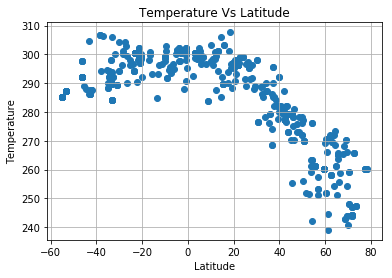

In [8]:
#Latitude and Temperature scattered plot
plt.scatter(weather_data["Lat"], weather_data["Max_Temp"])

#incorporate the other graph properties
plt.title("Temperature Vs Latitude")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Temperature Vs Latitude.png")

#Show plot
plt.show()

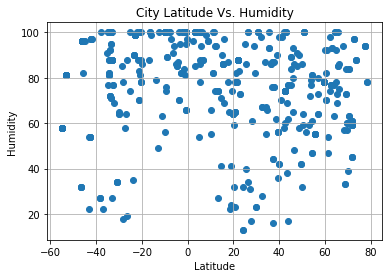

In [9]:
#Latitude and Humidity scattered plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"])

#incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")


plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Latitude Vs. Humidity.png")

#Show plot
plt.show()

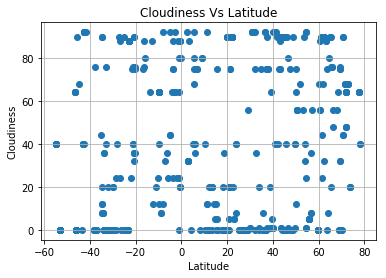

In [10]:
#Latitude and Cloudiness scattered plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])

#incorporate the other graph properties
plt.title("Cloudiness Vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("TCloudinessVsLatitude.png")

#Show plot
plt.show()

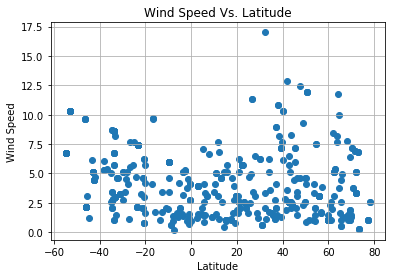

In [11]:
#Latitude and Wind speed scattered plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"])

#incorporate the other graph properties
plt.title("Wind Speed Vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("WindSpeedVsLatitude.png")

#Show plot
plt.show()